In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install plotly_express
import plotly_express as px
import numpy as np

In [3]:
### Xavier Initialization


# Calculate number of input and output neurons
n_input = 1  # Number of input features
n_output = 1  # Number of output neurons

# Calculate variance for Xavier initialization
variance = 1 / (n_input + n_output)

# Initialize weights using Xavier initialization
np.random.seed(42)  # For reproducibility
w1 = np.random.normal(loc=0.0, scale=np.sqrt(variance))
w0 = np.random.normal(loc=0.0, scale=np.sqrt(variance))

print("Initialized weights (W_1, w_0):", w1, w0)

Initialized weights (W_1, w_0): 0.351229945905575 -0.09776762495416379


In [4]:
X=[80,70,50,40,85,25,32,20,30,60]
Y=[85,60,60,38,90,30,33,26,28,55]


In [5]:
def show_plot(w1, w0, X, Y):

    Y_pred = []
    for i in range(len(X)):
        Y_pred.append(w1*X[i] + w0)

    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:], Y[:], color='red')
    plt.plot(X[:], Y_pred[:], color='blue')
    plt.title("Linear Regression")
    plt.xlabel("Internal Marks")
    plt.ylabel("University Marks")
    plt.show()

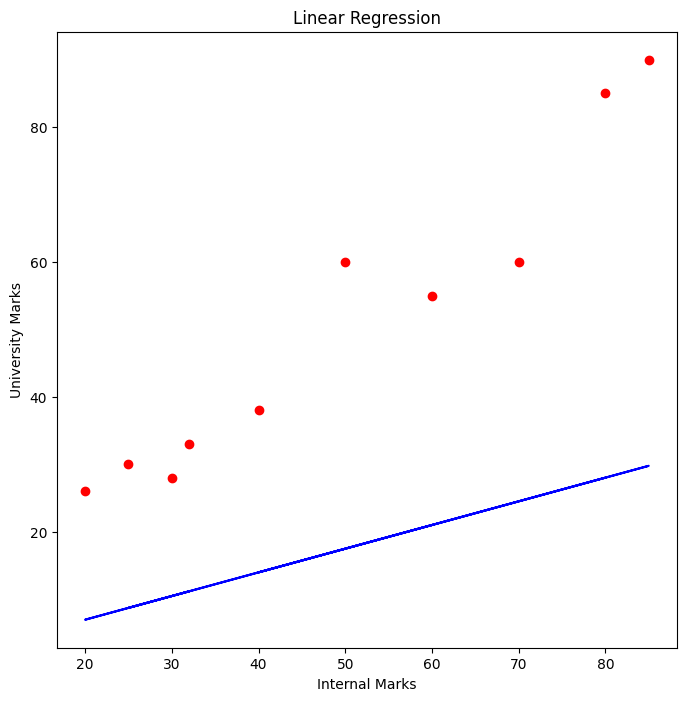

In [6]:
show_plot(w1, w0, X, Y)

In [7]:
# Linear Regression

def update_weights_MSE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    loss = 0
    for i in range(N):

        #loss func
        loss += (Y[i] - (m*X[i] + b))**2
        # Calculate partial derivatives

        # -2x(y - (mx + b))
        m_deriv += 2*X[i] * ((m*X[i] + b) - Y[i])

        # -2(y - (mx + b))
        b_deriv += 2*( (m*X[i] + b) - Y[i])

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b, loss/10

In [8]:
def show_gradient_descent(list_w1, list_w0, list_loss ):

    fig = plt.figure(figsize=(8,8))
    ax1 = plt.subplot(projection='3d')
    ax1.scatter3D(np.array(list_loss[:]), np.array(list_w1[:]), np.array(list_w0[:]), color='red')
    ax1.plot3D(np.array(list_loss[:]), np.array(list_w1[:]), np.array(list_w0[:]), color='blue')
    ax1.set_title('Cost_func vs Slope (Gradient descent)')
    ax1.set_xlabel('loss')
    ax1.set_ylabel('w1')
    ax1.set_zlabel('w0')
    plt.show()
    ax1.clear()

def show_gradient_descent_advanced(list_w1, list_w0, list_loss):

    px.line_3d(x=np.array(list_loss),
              y=np.array(list_w1),
              z=np.array(list_w0),
              markers=True,
              #color=np.array(cost_list),
              #animation_frame=np.array(cost_list),
              #animation_group=np.array(cost_list)
              )

In [9]:
i=update_weights_MSE(0.35122994590,-0.0977676249541637, X, Y,0.0001)
j=update_weights_MSE(0.35122994590,-0.0977676249541637, X, Y,0.001)
k=update_weights_MSE(0.35122994590,-0.0977676249541637, X, Y,0.01)

In [10]:
print(i,j,k)

(0.7399763304958169, -0.09110417409682887, 1328.8926880605002) (4.238693791858169, -0.031133116380815395, 1328.8926880605002) (39.2258684054817, 0.5685774607793195, 1328.8926880605002)


In [11]:
m=update_weights_MSE(00.7399763304958169, -0.09110417409682887, X, Y,0.0001)
n=update_weights_MSE(4.238693791858169, -0.031133116380815395, X, Y,0.001)
o=update_weights_MSE(39.2258684054817, 0.5685774607793195, X, Y,0.01)

In [12]:
print(m,n,o)

(0.9018314062512305, -0.08826732035408835, 258.3545286727493) (-14.562973246224, -0.3471583192668976, 30326.41455156763) (-2190.812581538971, -37.031048599430264, 4261594.457061597)


In [13]:
def main(w1, w0, iter, advanced, l_r=0.0001):

    list_w1 = []
    list_w0 = []
    list_loss = []

    for i in range(iter):

        w1, w0, loss = update_weights_MSE(w1, w0, X, Y, l_r)

        list_w1.append(w1)
        list_w0.append(w0)
        list_loss.append(loss)

        print("Trained weights (w1, w0):", w1, w0, loss)

        show_plot(w1, w0, X, Y)

        if advanced==True:
            show_gradient_descent_advanced(list_w1, list_w0, list_loss)
        else:
            show_gradient_descent(list_w0, list_w1, list_loss)

Trained weights (w1, w0): 0.739976330498139 -0.09110417409688382 1328.8926880388276


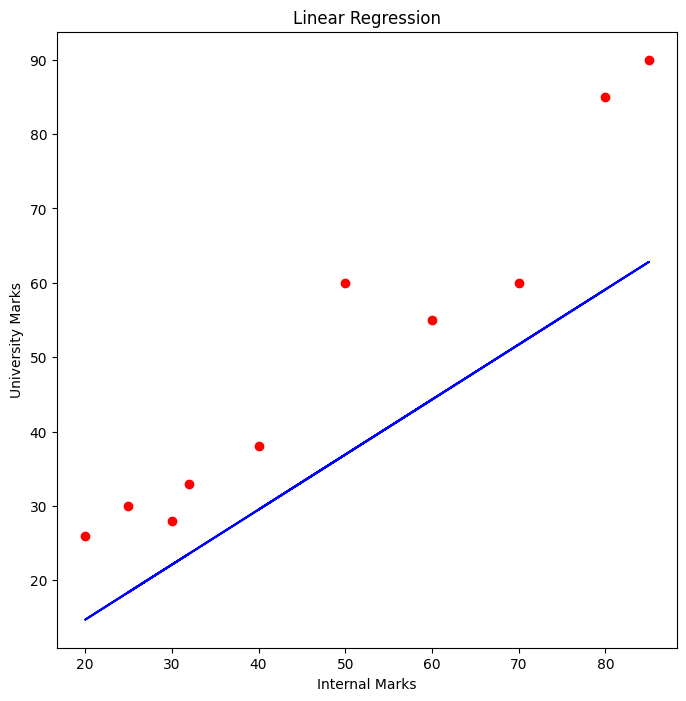

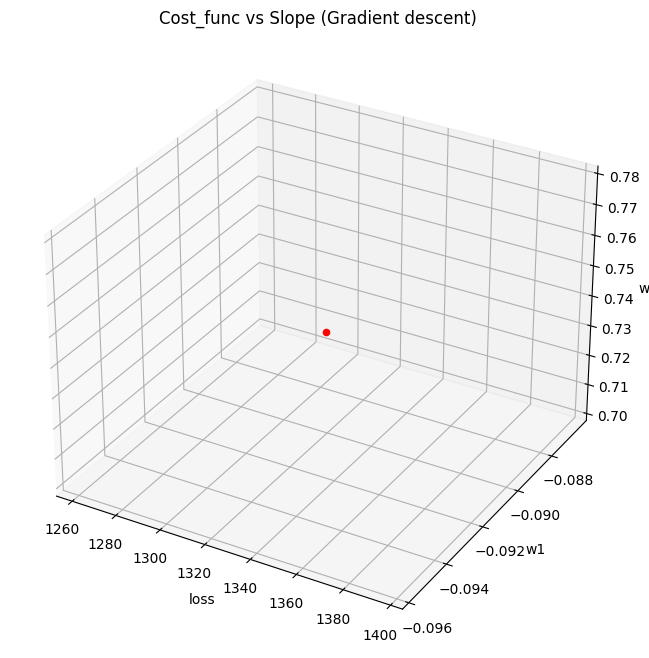

Trained weights (w1, w0): 0.9018314062521983 -0.08826732035416612 258.35452866899243


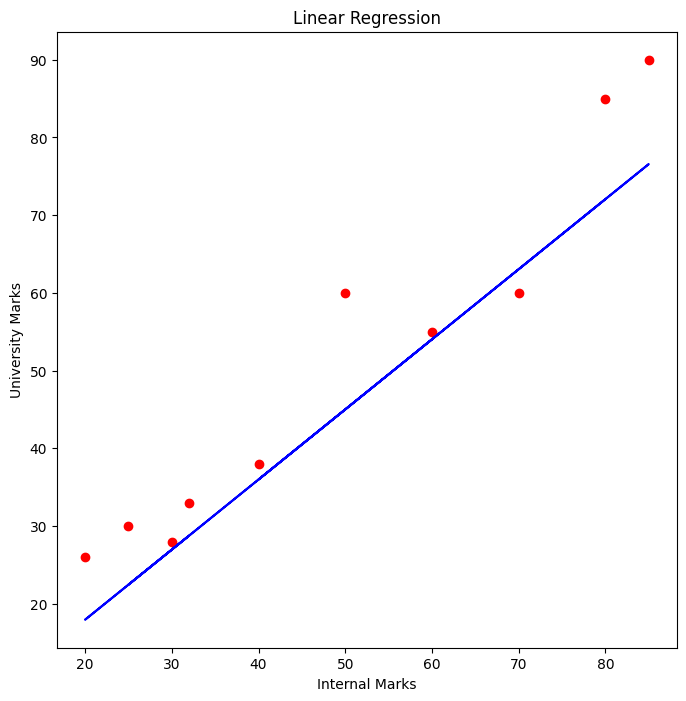

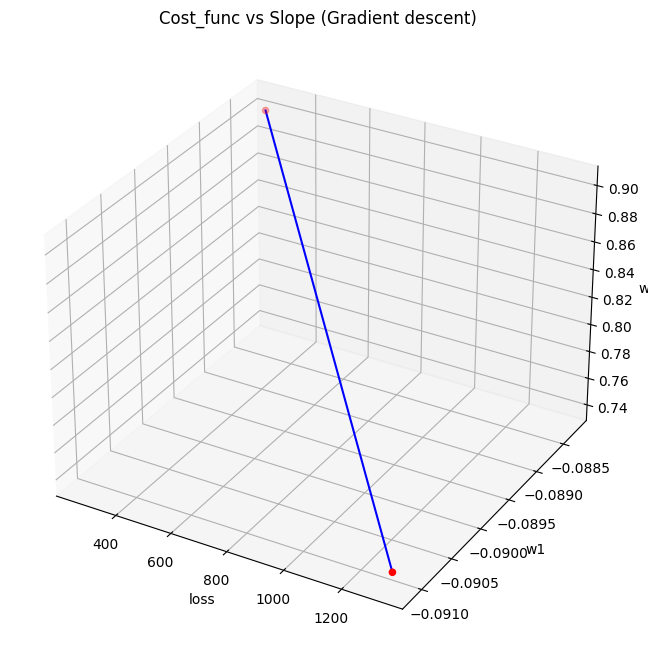

Trained weights (w1, w0): 0.9692193677644506 -0.08702368792761692 72.77590414253807


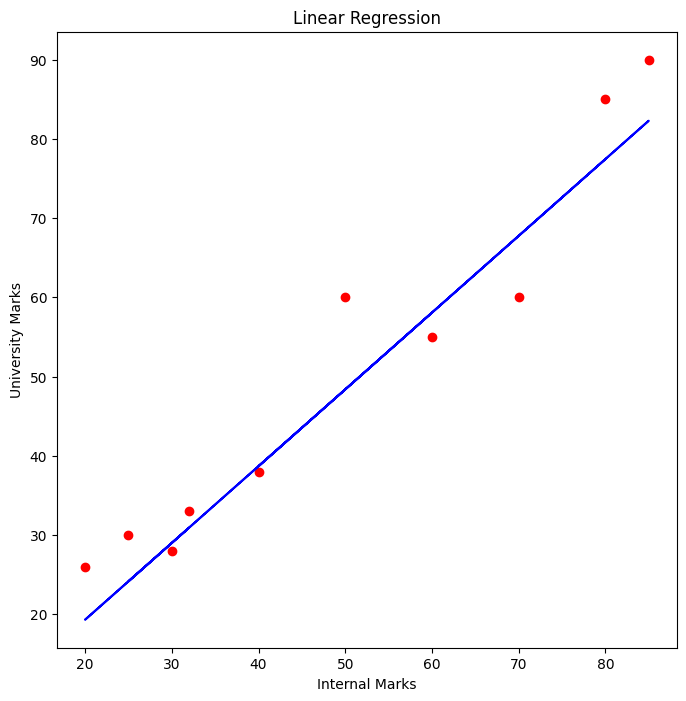

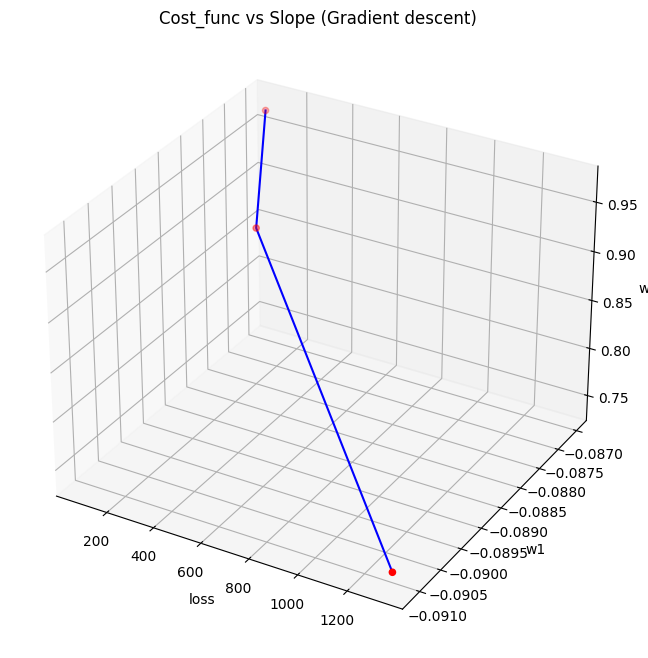

Trained weights (w1, w0): 0.9972755641504567 -0.08644340176883358 40.60562652597168


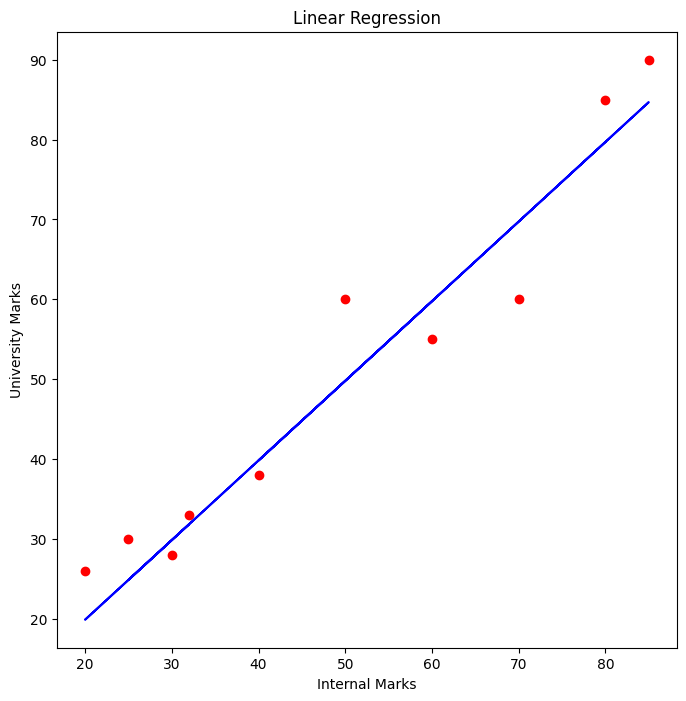

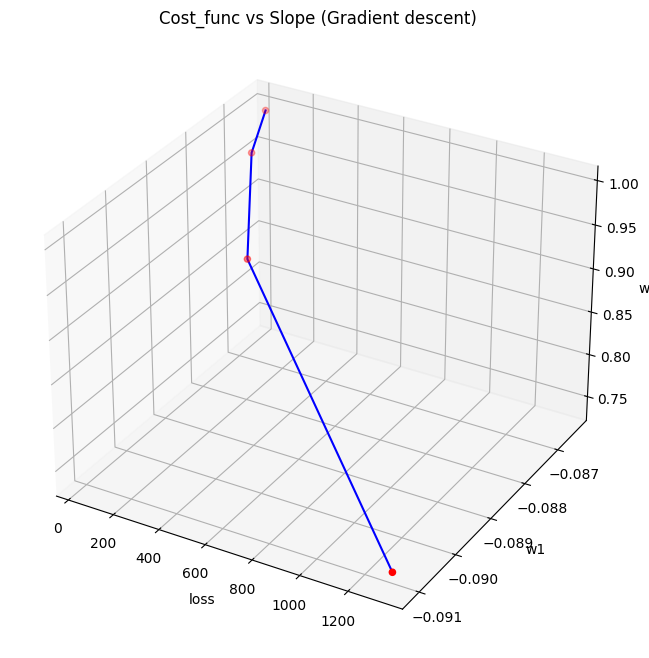

Trained weights (w1, w0): 1.0089558210533536 -0.0861393046397203 35.02879186328246


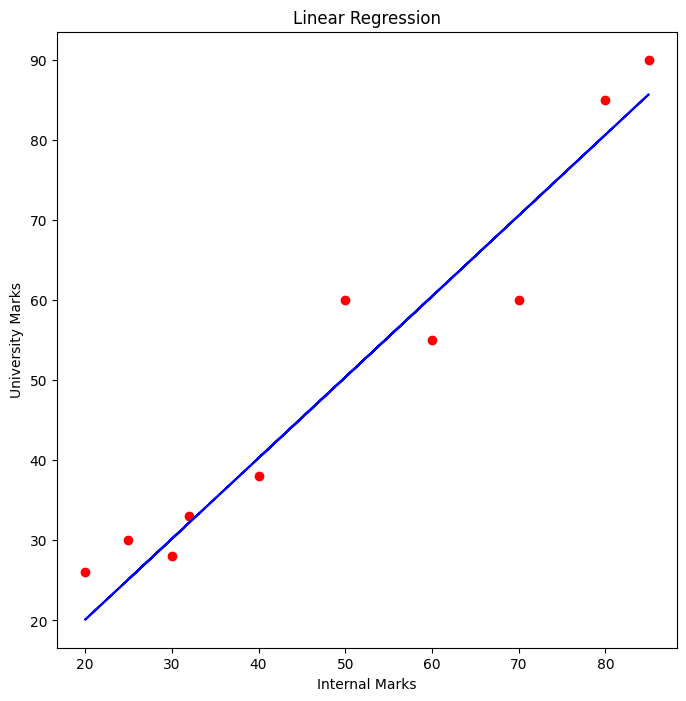

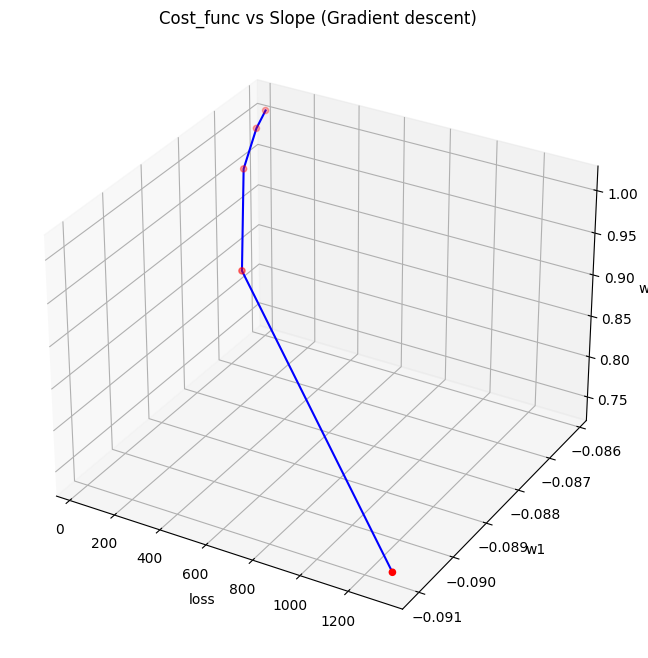

In [14]:
iter = 5
l_r = 0.0001

np.random.seed(42)  # For reproducibility
w1 = np.random.normal(loc=0.0, scale=np.sqrt(variance))
w0 = np.random.normal(loc=0.0, scale=np.sqrt(variance))

main(iter=iter, advanced=False, l_r=l_r, w1=w1, w0=w0)